In [36]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
data_index=pd.read_csv('../data/out_csv/index_India.csv')

In [39]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-11,0.045886,0.044242,0.148258,62.0,6.0,1.0,1.0,0.053155,0.0,0.0,0.0,0.0
1,2020-03-12,0.045886,0.044242,0.148258,73.0,11.0,1.0,0.0,0.053155,0.0,0.0,0.0,0.0
2,2020-03-13,0.049789,0.068661,0.148258,82.0,9.0,2.0,1.0,0.056753,0.0,0.0,0.0,0.0
3,2020-03-14,0.049789,0.068661,0.148258,102.0,20.0,2.0,0.0,0.056753,0.0,0.0,0.0,0.0
4,2020-03-15,0.052708,0.073225,0.148258,113.0,11.0,2.0,0.0,0.059468,0.0,0.0,0.0,0.0


In [40]:
data_index=data_index.set_index('date')

In [41]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052708,0.073225,0.222387,330.0,86.0,4.0,0.0,0.064865,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132755,0.164773,0.222387,396.0,66.0,7.0,3.0,0.138742,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118602,0.142644,0.222387,499.0,103.0,10.0,3.0,0.125683,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118602,0.142644,0.222387,536.0,37.0,10.0,0.0,0.125683,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132755,0.164773,0.222387,657.0,121.0,12.0,2.0,0.138742,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


In [42]:
data_index=data_index.fillna(0)

In [43]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052708,0.073225,0.222387,330.0,86.0,4.0,0.0,0.064865,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132755,0.164773,0.222387,396.0,66.0,7.0,3.0,0.138742,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118602,0.142644,0.222387,499.0,103.0,10.0,3.0,0.125683,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118602,0.142644,0.222387,536.0,37.0,10.0,0.0,0.125683,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132755,0.164773,0.222387,657.0,121.0,12.0,2.0,0.138742,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


Text(0.5, 0, 'Date')

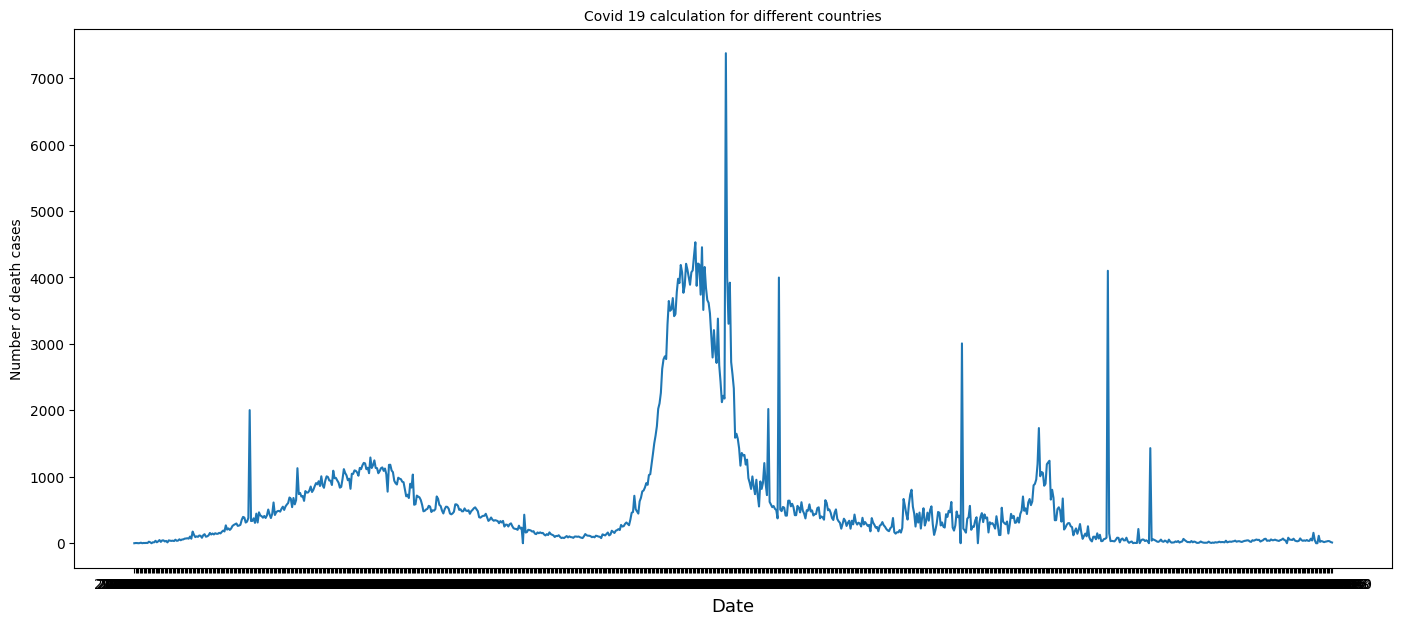

In [44]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

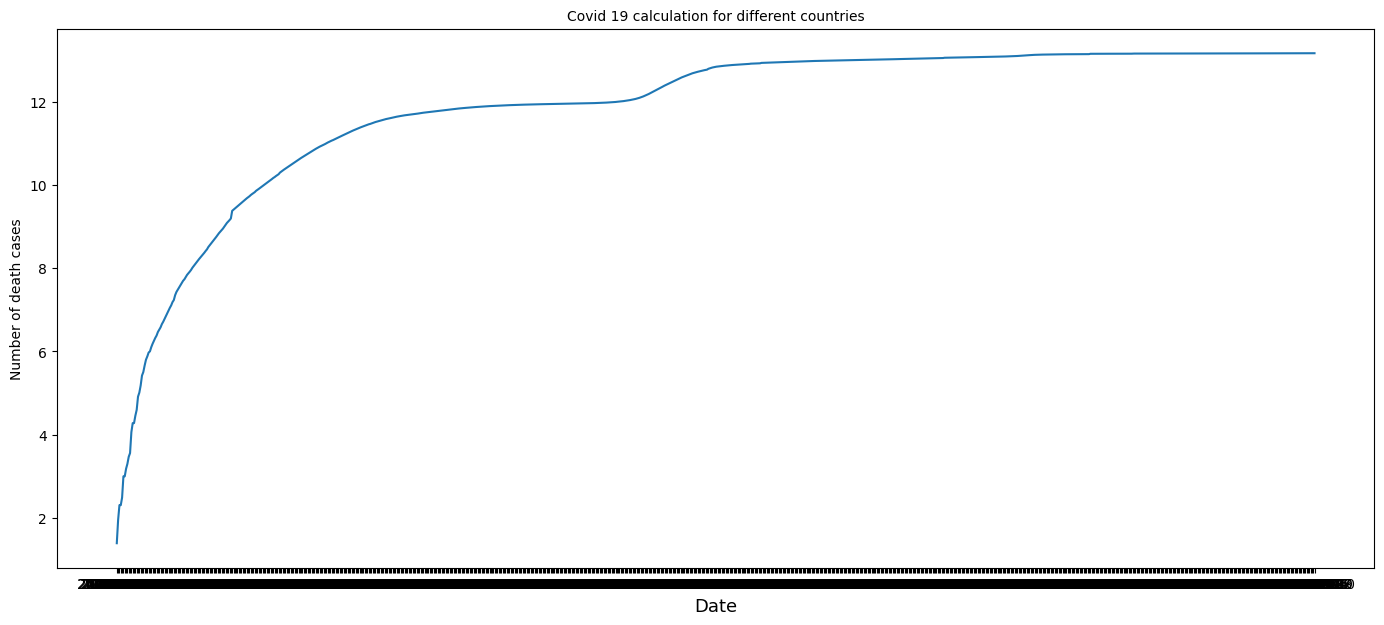

In [45]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

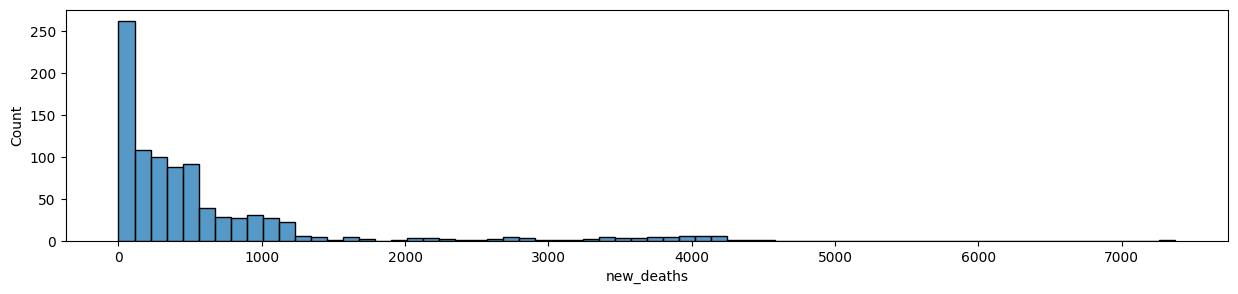

In [46]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [47]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [48]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052708,0.073225,0.222387,330.0,0.064865,0.000000e+00,0.000000e+00,0.0,0.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132755,0.164773,0.222387,396.0,0.138742,0.000000e+00,0.000000e+00,0.0,0.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118602,0.142644,0.222387,499.0,0.125683,0.000000e+00,0.000000e+00,0.0,0.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118602,0.142644,0.222387,536.0,0.125683,0.000000e+00,0.000000e+00,0.0,0.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132755,0.164773,0.222387,657.0,0.138742,0.000000e+00,0.000000e+00,0.0,0.0,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,0.075651,0.061032,0.000000,44469661.0,0.069812,2.137561e+09,1.024957e+09,943763419.0,168840995.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0,527799.0,527799.0,527754.0
2022-09-07,0.000000,0.000000,0.000000,44478636.0,0.069812,2.139660e+09,1.025025e+09,943959568.0,170674857.0,528057.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0,527799.0,527799.0
2022-09-08,0.000000,0.000000,0.000000,44484729.0,0.069812,2.143231e+09,1.025117e+09,944241171.0,173873302.0,528090.0,528057.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0,527799.0


## scaling data

In [49]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [60]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

50

# Model

In [51]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [46]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=8, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=10, degree=

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=8, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=8, gamma=scale, kernel=poly; total time= 2.0min
[CV] END ..C=5, coef0=10, degree=8, gamma=scale, kernel=poly; total time=  58.7s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=0.01, degree=8, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=10, coef0=10, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..C=10, coef0=10, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..C=10, c

## fitting the model for train and test set

In [53]:
model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [54]:
y_pred=model.predict(X_test)

## evaluating model performance

In [55]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.0056032331041222135

In [56]:
y_pred.shape

(50,)

Text(0.5, 0, 'Date')

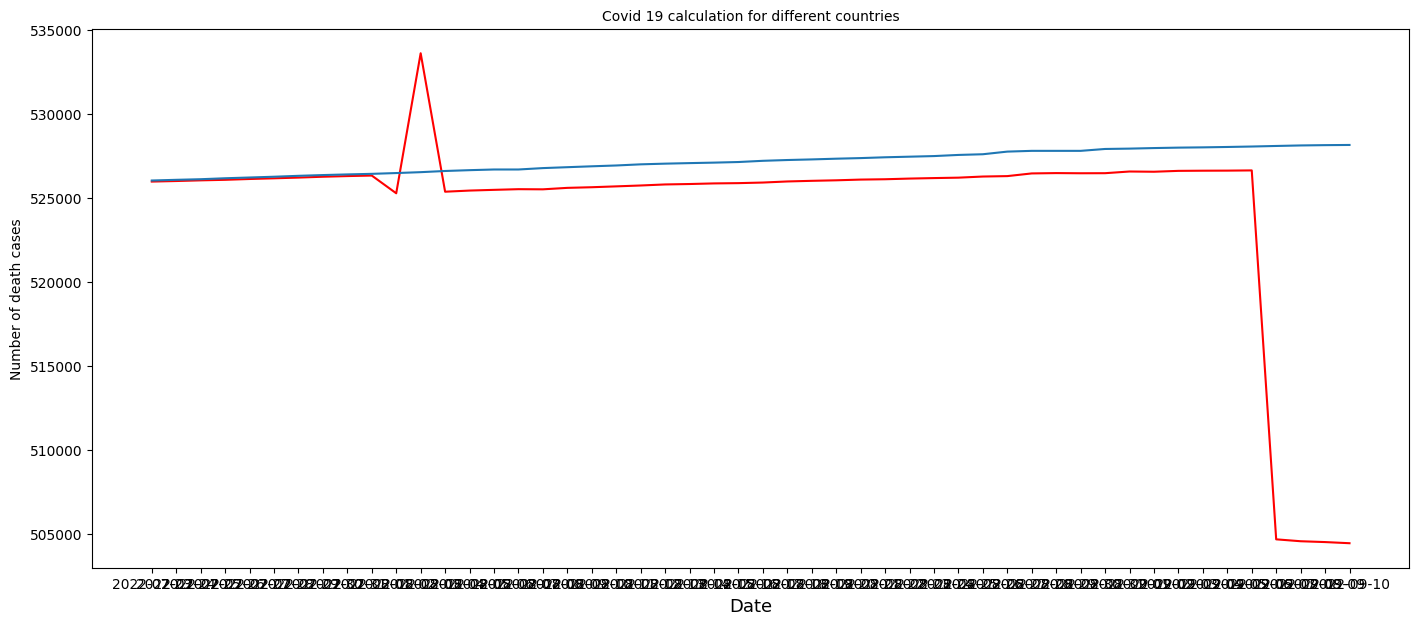

In [58]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index,y_pred,color='r');
plt.plot(y_test.index,y_test);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)